# QSAR Model Building for HER2 Inhibitors.

## 1. Import Data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('06_HER2_PubChemFP_with_pIC50.csv')
data

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,CHEMBL68920,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.522879
1,CHEMBL69960,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.397940
2,CHEMBL65848,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.000000
3,CHEMBL67057,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.301030
4,CHEMBL69629,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2550,CHEMBL4642574,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.982967
2551,CHEMBL4643111,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.920819
2552,CHEMBL2441563,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.920819
2553,CHEMBL4648271,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.397940


## 2. Assigning features and target variables

In [3]:
X = data.iloc[:,1:-1]
y = data.iloc[:,-1].values

In [4]:
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2550,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2551,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2552,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2553,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y

array([6.52287875, 6.39794001, 7.        , ..., 7.92081875, 8.39794001,
       8.39794001])

In [6]:
print(X.shape, y.shape)

(2555, 881) (2555,)


### 3. Data Preprocessing

In [7]:
#Removing low variance features

from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP13,PubchemFP16,PubchemFP17,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP24,...,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP805,PubchemFP813,PubchemFP819,PubchemFP821,PubchemFP824,PubchemFP826,PubchemFP827
0,1,1,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,1,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,1,1,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,1,1,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,1,1,1,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2550,1,1,1,0,1,0,1,1,1,0,...,0,0,1,1,1,0,1,0,1,1
2551,1,1,1,1,1,0,1,0,1,0,...,0,0,1,1,1,0,1,0,1,1
2552,1,1,1,0,1,0,1,1,1,0,...,0,0,1,1,1,0,1,0,1,1
2553,0,0,0,0,1,0,1,0,1,0,...,0,0,1,1,1,0,1,0,1,1


In [8]:
X.to_csv('descriptor_list.csv', index=False)

# Decision Tree Regression Model

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
model = DecisionTreeRegressor(random_state=0)
model.fit(X,y)
r2 = model.score(X,y)
r2

0.9667135313374705

### Model Prediction

In [11]:
y_pred = model.predict(X)
y_pred

array([6.52287875, 6.39794001, 7.        , ..., 7.92081875, 8.39794001,
       8.39794001])

### Model Performance

In [12]:
print('Mean squared error (MSE): %.2f' % mean_squared_error(y, y_pred))
print('Coefficient of determination (R^2): %.2f' %r2_score(y, y_pred))

Mean squared error (MSE): 0.05
Coefficient of determination (R^2): 0.97


# Data Visualiztion (Original vs Predicted pIC50 values)

In [13]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Predicted PIC50')

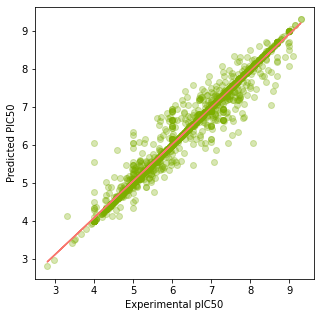

In [14]:
plt.figure(figsize=(5,5))
plt.scatter(x=y, y=y_pred, c="#7CAE00", alpha=0.3)

#trendline
z = np.polyfit(y, y_pred, 1)
p = np.poly1d(z)

plt.plot(y, p(y), "#F8766D")
plt.xlabel('Experimental pIC50')
plt.ylabel('Predicted PIC50')

### Saving the model

In [15]:
import pickle

In [17]:
pickle.dump(model, open('HER2_model.pkl', 'wb'))